In [1]:
# Importing datasets
import pandas as pd
import numpy as np


In [4]:
train = pd.read_csv('train.csv', parse_dates=[1])
test = pd.read_csv('test.csv', parse_dates=[1])
df = train.copy()
df_test = test.copy()

In [5]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [7]:
df.drop('ID',inplace=True,axis =1)

In [8]:
df.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  18288 non-null  datetime64[ns]
 1   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.9 KB


### persistence model

In [87]:
df['c'] = df['Count'].shift(1)

In [88]:
df.shape[0]

18288

In [89]:
train, test = df[1:int(df.shape[0]*0.8)], df[int(df.shape[0]*0.8):]

In [90]:
train.shape,test.shape

((14629, 3), (3658, 3))

In [91]:
train.head()

,Datetime,Count,c
1,2012-08-25 01:00:00,2,8.0
2,2012-08-25 02:00:00,6,2.0
3,2012-08-25 03:00:00,2,6.0
4,2012-08-25 04:00:00,2,2.0
5,2012-08-25 05:00:00,2,2.0


In [92]:
train_X, train_y = train['c'], train['Count']
test_X, test_y = test['c'], test['Count']

#### walk forward validation 

In [93]:
predictions = test_X.copy()

In [94]:
print(predictions)
print(test_y)

14630    206.0
14631    204.0
14632    172.0
14633    184.0
14634    124.0
         ...  
18283    680.0
18284    868.0
18285    732.0
18286    702.0
18287    580.0
Name: c, Length: 3658, dtype: float64
14630    204
14631    172
14632    184
14633    124
14634    190
        ... 
18283    868
18284    732
18285    702
18286    580
18287    534
Name: Count, Length: 3658, dtype: int64


In [110]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y[0:2], predictions[0:2])
mse
#mse of first 100 data
# mse of this model would be a criterion for other models.. if mse of a model be more than this mse, the modeel wouldnt be efficent. 

514.0

In [111]:
from matplotlib import pyplot as plt

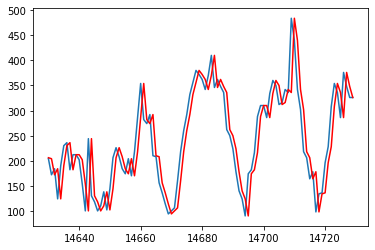

In [112]:
plt.plot(test_y[0:100])
plt.plot(predictions[0:100],color='red')

## auto regression model

In [113]:
train, test = df.Count[1:int(df.shape[0]*0.8)], df.Count[int(df.shape[0]*0.8):]

In [114]:
train.head()

1    2
2    6
3    2
4    2
5    2
Name: Count, dtype: int64

In [115]:
from statsmodels.tsa.ar_model import AR

In [116]:
model = AR(train)
model_fit = model.fit()

F:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [117]:
#number of lag values 
model_fit.k_ar

42

In [118]:
#Coef of lag variables
model_fit.params

const        1.443635
L1.Count     0.714994
L2.Count     0.140894
L3.Count     0.015470
L4.Count     0.038366
L5.Count     0.022670
L6.Count    -0.050786
L7.Count    -0.016974
L8.Count     0.015791
L9.Count    -0.027516
L10.Count   -0.004302
L11.Count    0.052985
L12.Count    0.021718
L13.Count   -0.012776
L14.Count   -0.011611
L15.Count   -0.003702
L16.Count   -0.018504
L17.Count   -0.022221
L18.Count   -0.003718
L19.Count    0.042346
L20.Count    0.000981
L21.Count    0.046979
L22.Count    0.049858
L23.Count    0.060790
L24.Count    0.103202
L25.Count   -0.029622
L26.Count   -0.057985
L27.Count   -0.042304
L28.Count   -0.024070
L29.Count   -0.015950
L30.Count   -0.027984
L31.Count   -0.007480
L32.Count    0.013335
L33.Count    0.001505
L34.Count   -0.004249
L35.Count    0.007998
L36.Count    0.022434
L37.Count   -0.000993
L38.Count   -0.042829
L39.Count   -0.004825
L40.Count    0.002422
L41.Count   -0.001032
L42.Count    0.040534
dtype: float64

In [130]:
predictions_ar = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [133]:
predictions_ar

14630    219.569404
14631    219.890327
14632    222.337004
14633    231.288321
14634    230.962741
            ...    
18283     89.326142
18284     89.326142
18285     89.326142
18286     89.326142
18287     89.326142
Length: 3658, dtype: float64

In [134]:
predictions_autoregression.iloc[0:2],test.iloc[0:2]

(14630    219.569404
 14631    219.890327
 dtype: float64,
 14630    204
 14631    172
 Name: Count, dtype: int64)

In [136]:
mse = mean_squared_error(test, predictions_ar)
mse

95729.64793098494

In [ ]:
plt.plot(test_y)
pp.plot(predictions, color='red')